### K-means

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Universities.csv")
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
df.drop(['Univ','Top10','Accept','SFRatio','GradRate'],axis=1,inplace=True)
df

,SAT,Expenses
0,1310,22704
1,1415,63575
2,1260,25026
3,1310,31510
4,1280,21864
5,1340,32162
6,1315,31585
7,1255,20126
8,1400,39525
9,1305,58691


In [5]:
from sklearn.cluster import KMeans
k=5
kmean =KMeans(n_clusters=k)
cluster_info =kmean.fit(df)

In [6]:
cluster_info.n_clusters

5

In [7]:
cluster_info.cluster_centers_

array([[ 1346.66666667, 32799.5       ],
       [ 1143.25      , 12361.625     ],
       [ 1360.        , 61133.        ],
       [ 1275.        , 24220.83333333],
       [ 1355.        , 40473.        ]])

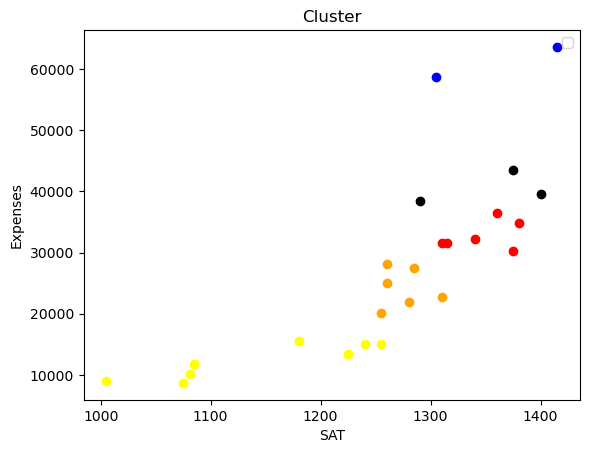

In [8]:
plt.scatter(df['SAT'][cluster_info.labels_==0],df['Expenses'][cluster_info.labels_==0],color = "red")
plt.scatter(df['SAT'][cluster_info.labels_==1],df['Expenses'][cluster_info.labels_==1],color = "yellow")
plt.scatter(df['SAT'][cluster_info.labels_==2],df['Expenses'][cluster_info.labels_==2],color = "blue")
plt.scatter(df['SAT'][cluster_info.labels_==3],df['Expenses'][cluster_info.labels_==3],color = "orange")
plt.scatter(df['SAT'][cluster_info.labels_==4],df['Expenses'][cluster_info.labels_==4],color = "black")
plt.xlabel("SAT")
plt.ylabel("Expenses")
plt.title("Cluster")
plt.legend()

In [9]:
wss =[]
for n in range(1,10):
    kmean=KMeans(n_clusters=n)
    cluster_info =kmean.fit(df)
    wss.append(cluster_info.inertia_)

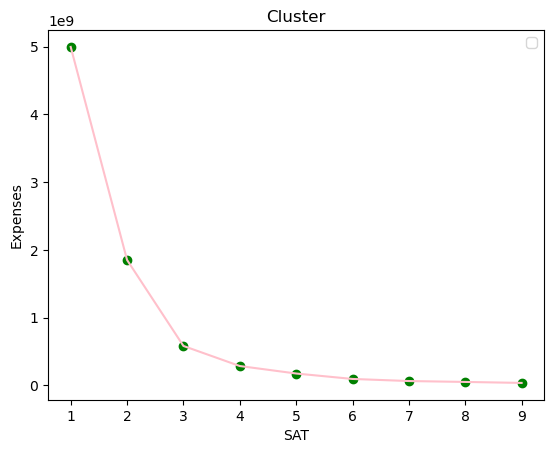

In [10]:
plt.scatter(range(1,10),wss,color="green")
plt.plot(range(1,10),wss,color="pink")
plt.xlabel("SAT")
plt.ylabel("Expenses")
plt.title("Cluster")
plt.legend()

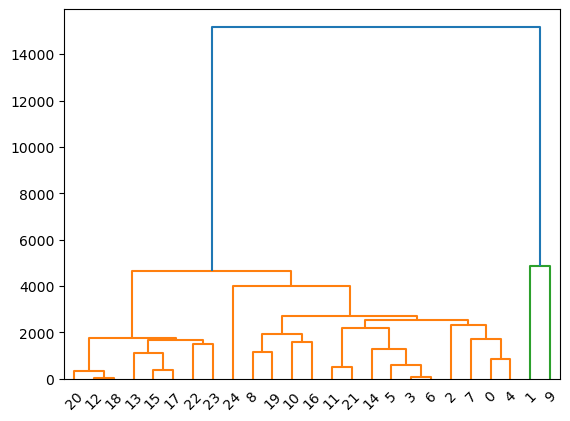

In [11]:
from scipy.cluster import hierarchy

link =hierarchy.linkage(df,'single')
Dendogram = hierarchy.dendrogram(link)

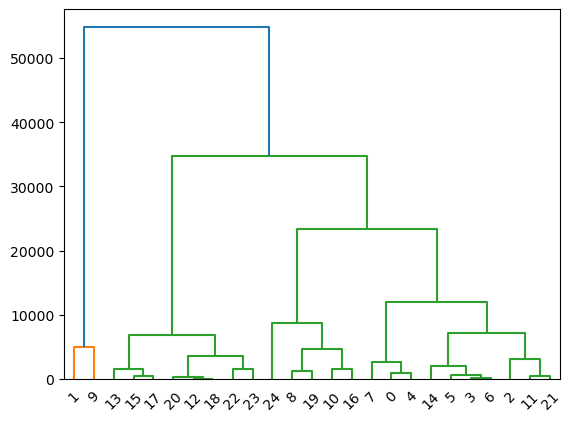

In [12]:

link =hierarchy.linkage(df,'complete')
Dendogram = hierarchy.dendrogram(link)

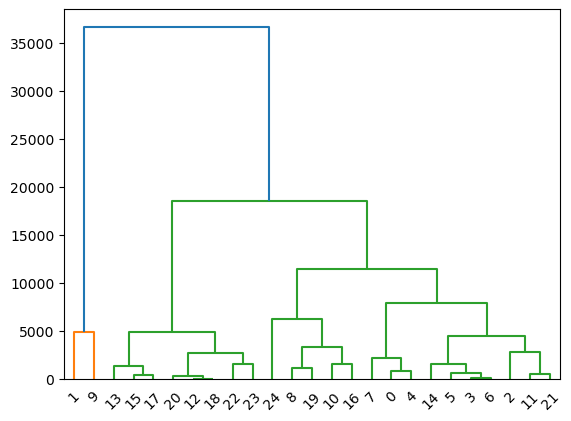

In [13]:
link =hierarchy.linkage(df,'average')
Dendogram = hierarchy.dendrogram(link)

In [14]:
from sklearn.cluster import AgglomerativeClustering

# create an object of AgglomerativeClustering
cluster_info = AgglomerativeClustering(n_clusters=2)

# build the clusters
cluster_info = cluster_info.fit(df)

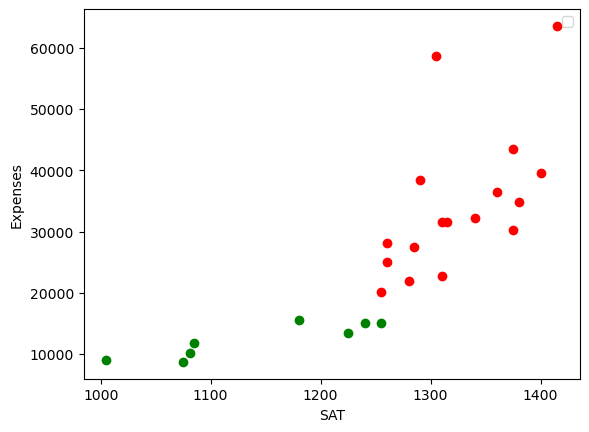

In [15]:
plt.scatter(df['SAT'][cluster_info.labels_==0],df['Expenses'][cluster_info.labels_==0],color ="red")
plt.scatter(df['SAT'][cluster_info.labels_==1],df['Expenses'][cluster_info.labels_==1],color ="green")
plt.xlabel("SAT")
plt.ylabel("Expenses")
plt.legend()

In [16]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=20000,min_samples=9)
db=db.fit(df)


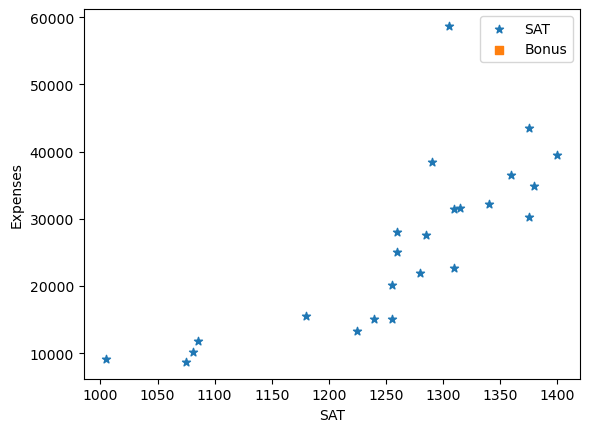

In [17]:
markers = ['*','s']
labels = [
    "SAT","Bonus"
]

for cluster in range(2):
    plt.scatter(
    df['SAT'][db.labels_==cluster],
    df['Expenses'][db.labels_==cluster],
    marker=markers[cluster],   
    label=labels[cluster])


plt.xlabel("SAT")   
plt.ylabel("Expenses") 
plt.legend()
